# Data Augmentation

데이터셋의 규모를 키울 수 있도록 데이터셋을 여러 가지 방법으로 증강(augment)시키는 방법이다.

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/Going_Deeper/2.augmentation/images/mycat.jpg'

(400, 500, 3)


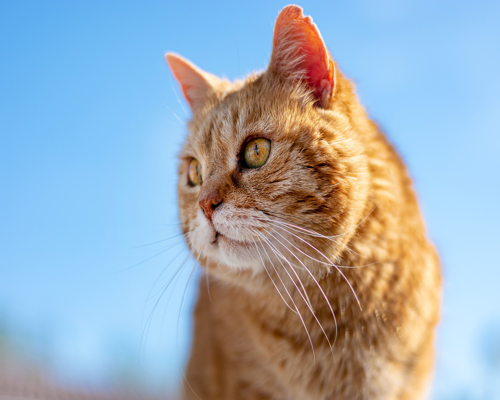

In [2]:
image = Image.open(sample_img_path).resize((500,400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

print(image_tensor.shape)
image

### 1. Flipping

이미지 대칭

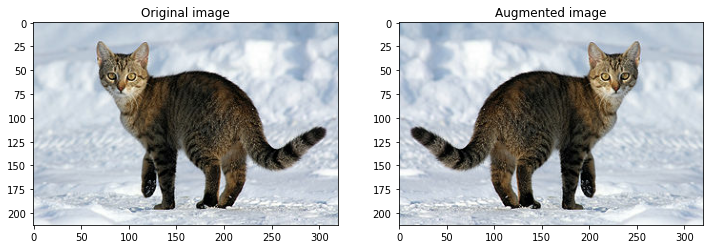

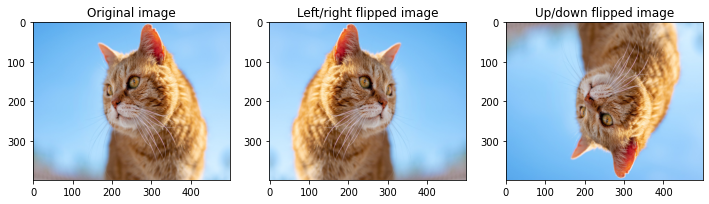

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)

flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('Left/right flipped image')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('Up/down flipped image')
plt.imshow(flip_ud_image)

plt.show()

### 2. Grayscale

RGB 이미지를 하나의 채널을 가지도록 해줌 (흑백 외에 다른 색상도 가능하다)

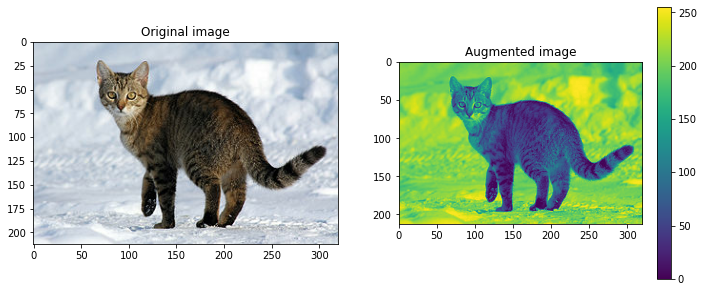

### 3. Saturation

RGB 이미지를 HSV 3가지 성분으로 색을 변경하고 S(saturation)채널에 오프셋을 적용, 조금 더 이미지를 선명하게 만들어 준다

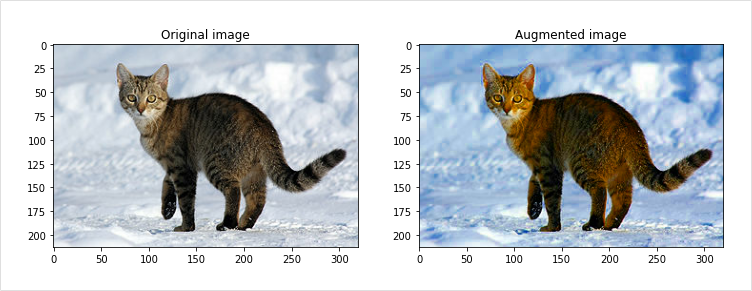

### 4. Brightness

밝기 조절

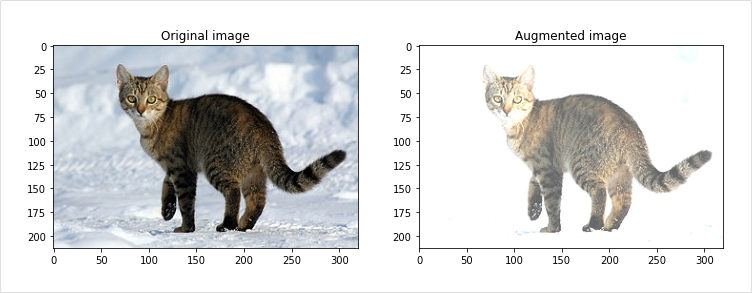

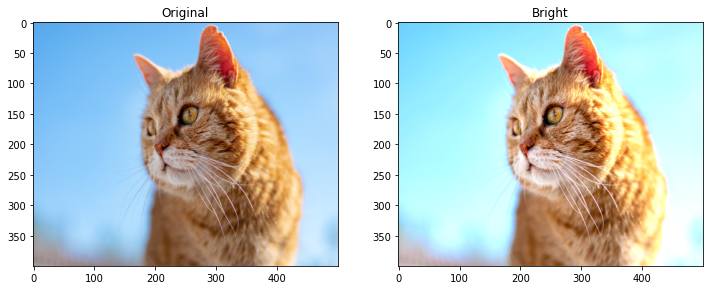

In [15]:
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(image)

plt.subplot(1,2,2)
plt.title('Bright')
plt.imshow(random_bright_image)

plt.show()

### 5. Rotation

이미지 각도 변환

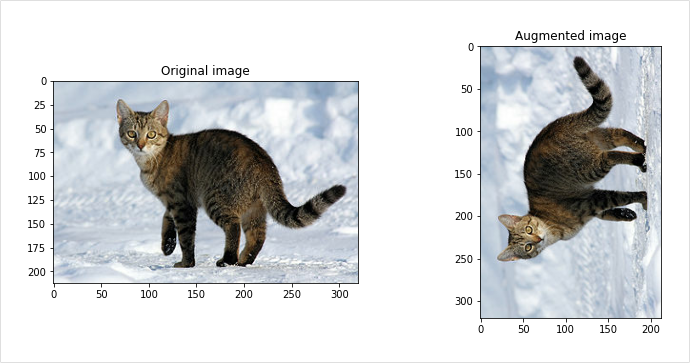

### 6. Center crop

이미지의 중앙을 기준으로 확대하는 방법

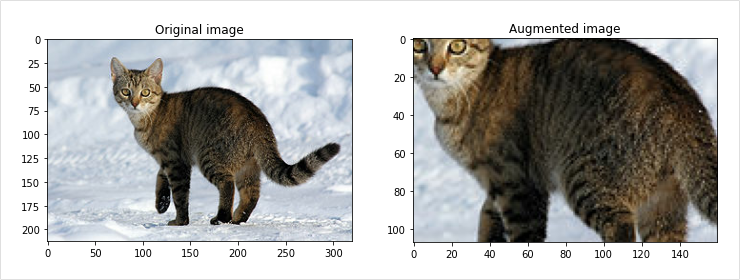

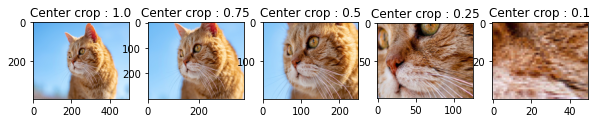

In [4]:
plt.figure(figsize=(12,15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_image = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1, col+1, i+1)
    plt.title(f'Center crop : {frac}')
    plt.imshow(cropped_image)

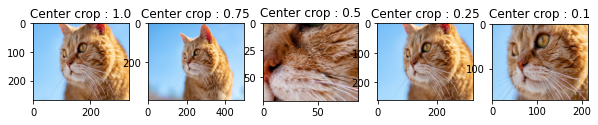

In [5]:
# tf.random.uniform을 사용

def random_central_crop(image_tensor, range=(0,1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

plt.figure(figsize=(12,15))

col=5
for i, frac in enumerate(central_fractions):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    plt.subplot(1, col+1, i+1)
    plt.title(f'Center crop : {frac}')
    plt.imshow(cropped_img)

<function matplotlib.pyplot.show(close=None, block=None)>

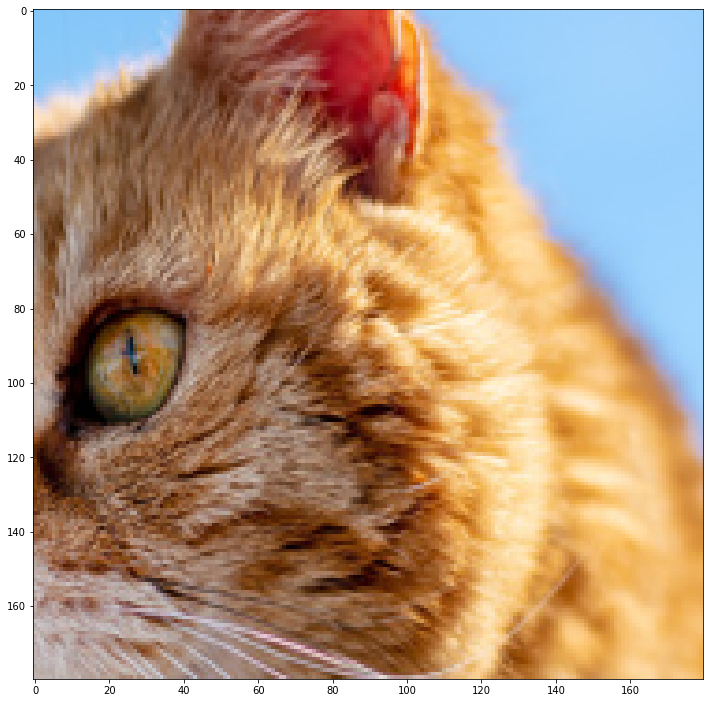

In [8]:
# tf.random_crop

plt.figure(figsize=(12,15))

random_crop_tensor = tf.image.random_crop(image_tensor, [180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show

이 외에도 Gaussian noise, Contrast change, Sharpen, Affine transformation, Padding, Blurring이 있다

# imgaug 라이브러리

In [16]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

### iaa.Affine()

이미지의 스케일을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있다.

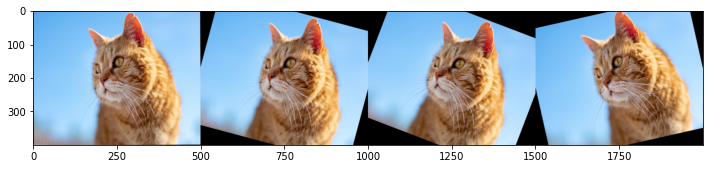

In [17]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Crop()

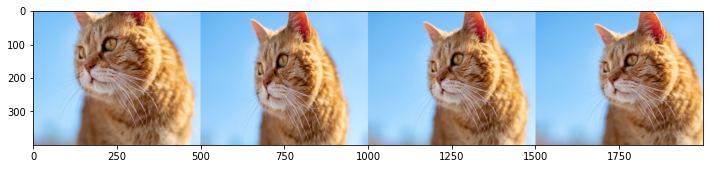

In [18]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Sequential()

여러 augmentation 기법을 조합하여 적용

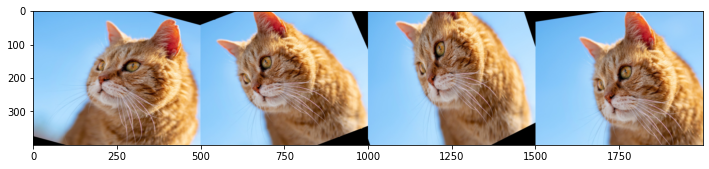

In [19]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.OneOf()

여러 augmentation 기법 중 하나를 선택

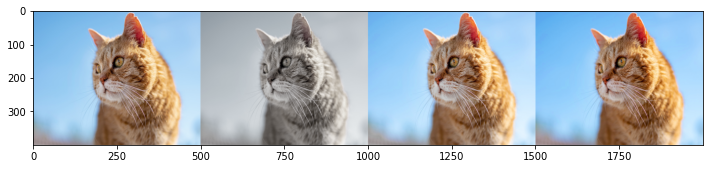

In [20]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()